In [12]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import CausalnexDataset as cd


file = '../../../datasets/preprocess_mars_express/MarsExpressPower/marsexpress_dataset_one_NPWD.csv'
a = cd.CausalnexDataset(dataset=file, delimiter_char=",", columns_to_drop=["ut_ms"], threshold=0, dropna=True)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


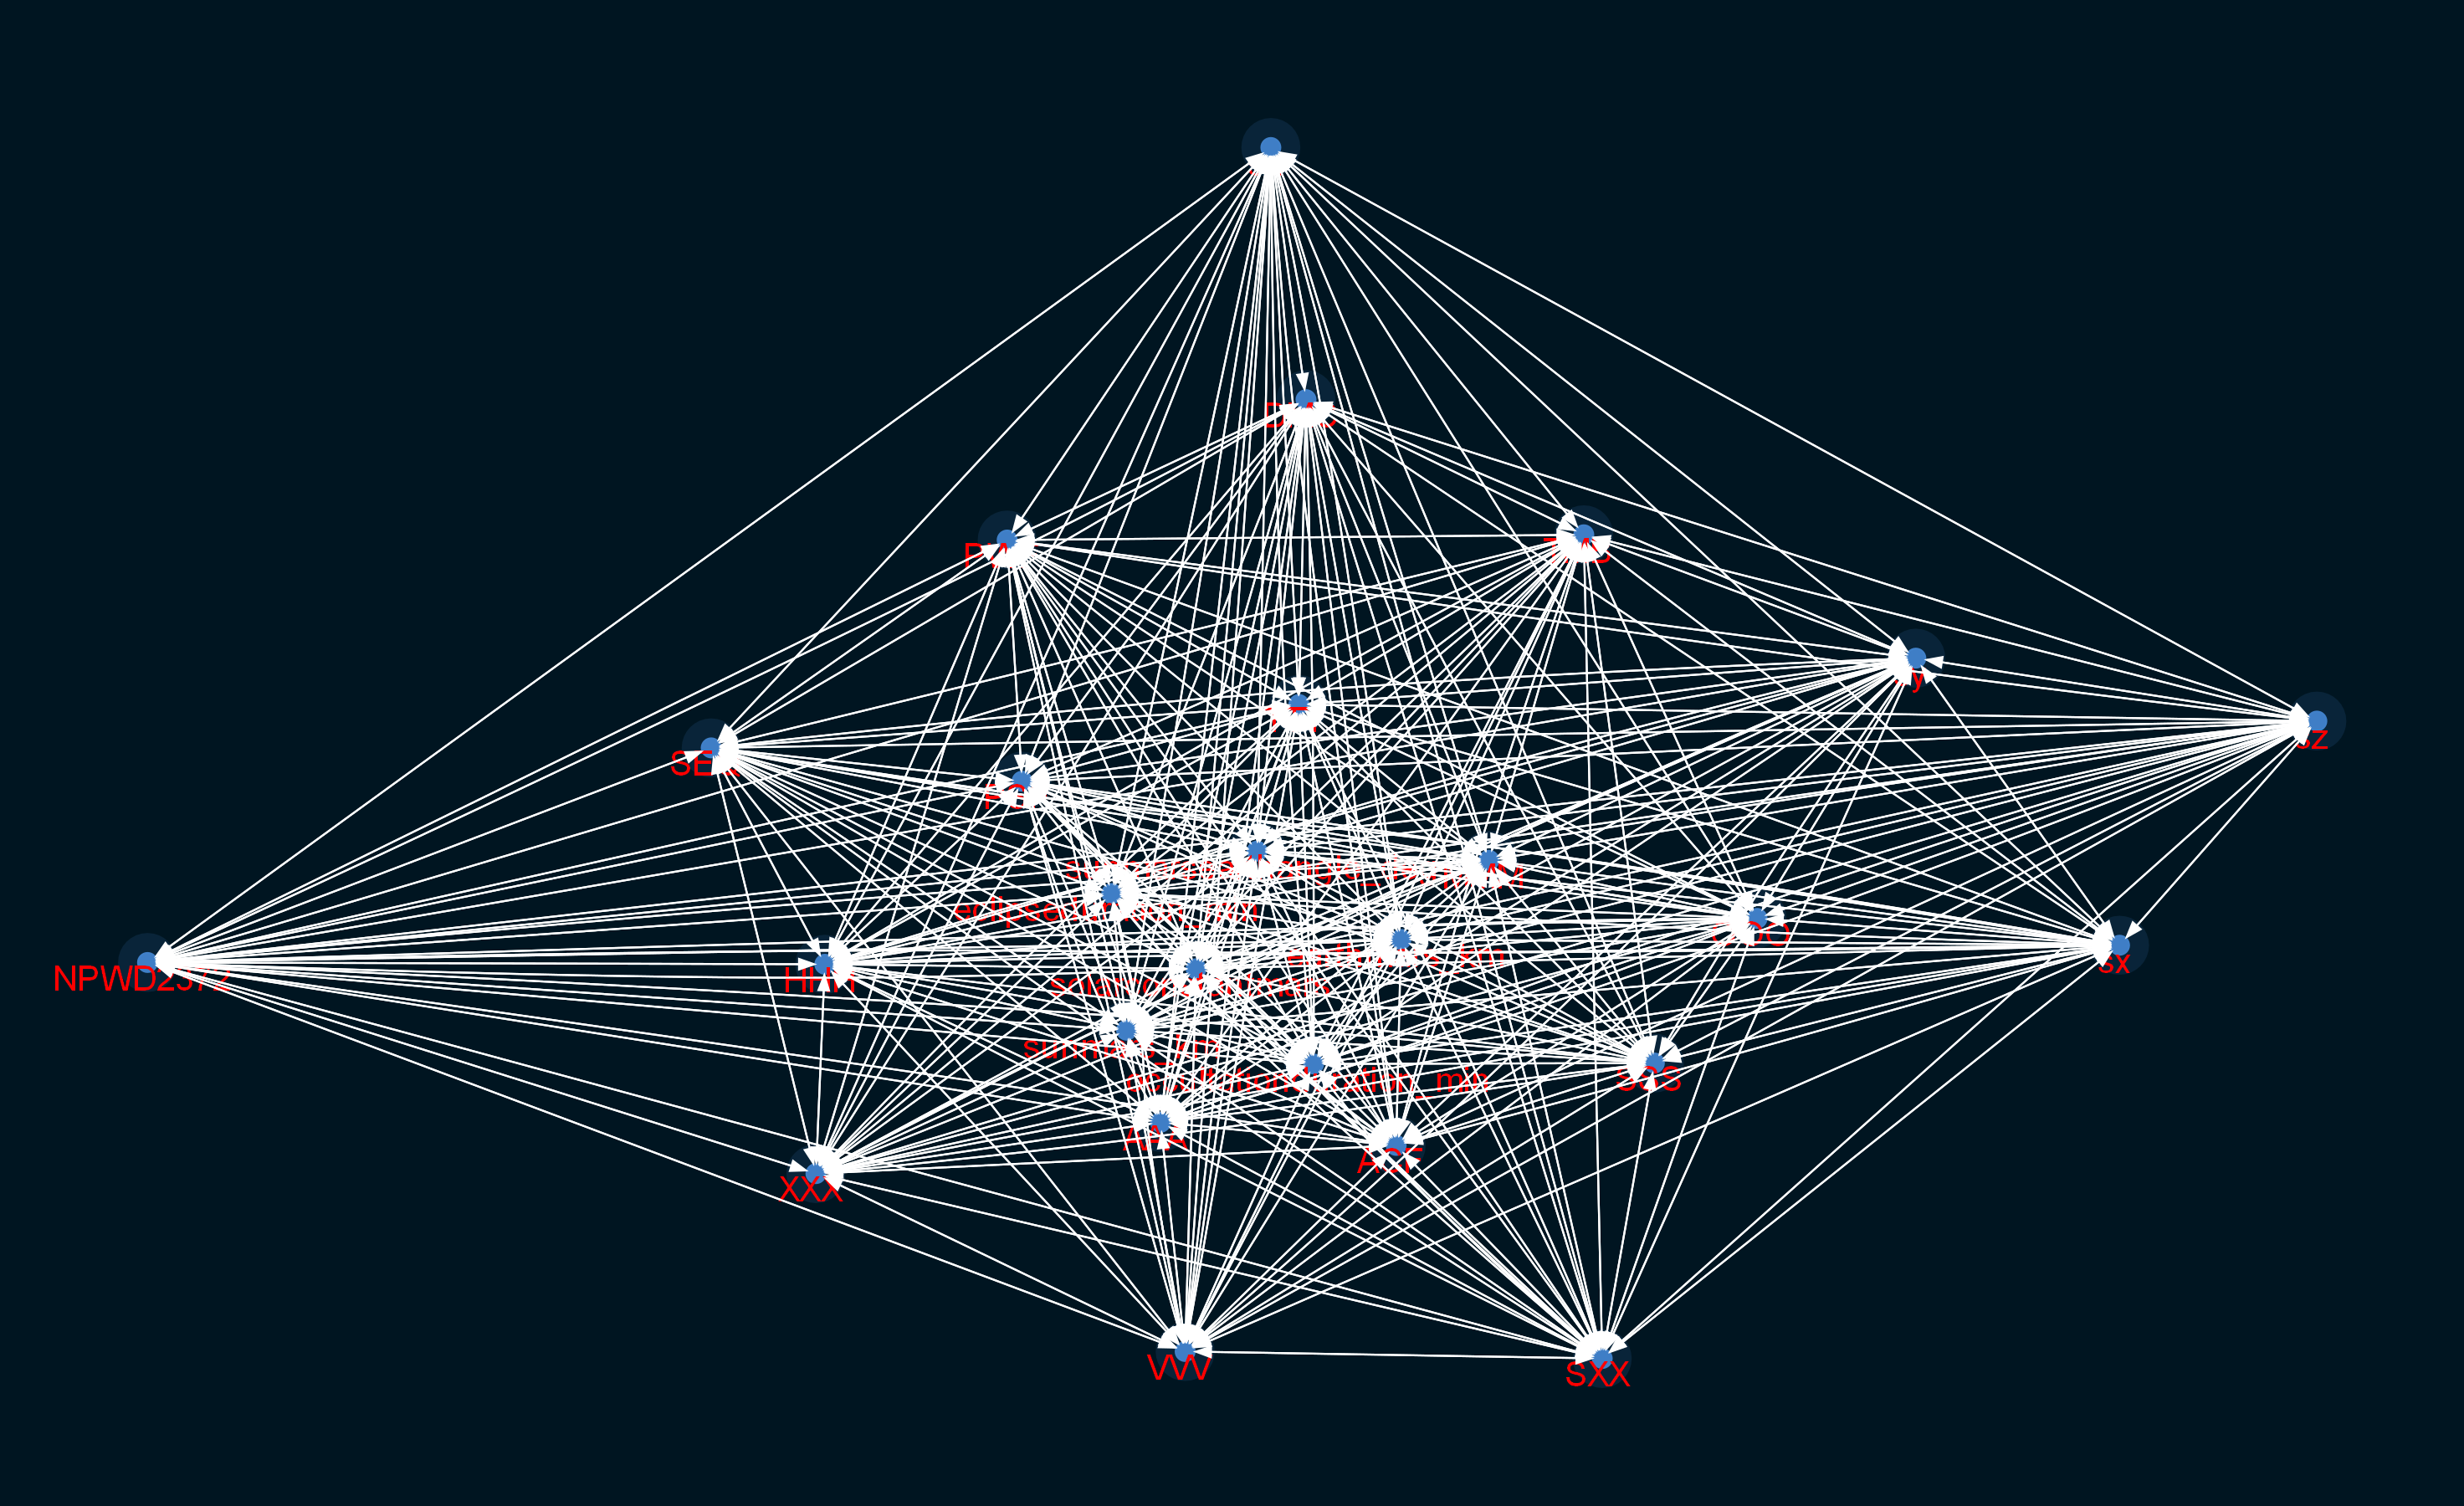

In [13]:


npwd_node = "NPWD2372"
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

In [14]:
# Obtenemos los datos estadísticos de la matriz de adyancencia para planear un cribado de las relaciones espurias y menos relevantes


a.get_edges_data(specific_nodes=npwd_node)

,weight
count,5.000000e+01
mean,3.755441e-03
std,1.862516e-02
min,2.649404e-13
25%,2.897936e-11
50%,3.738383e-10
75%,5.392598e-09
max,9.999314e-02


C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding),

Run Image(result.draw(format='png')) to draw the graph


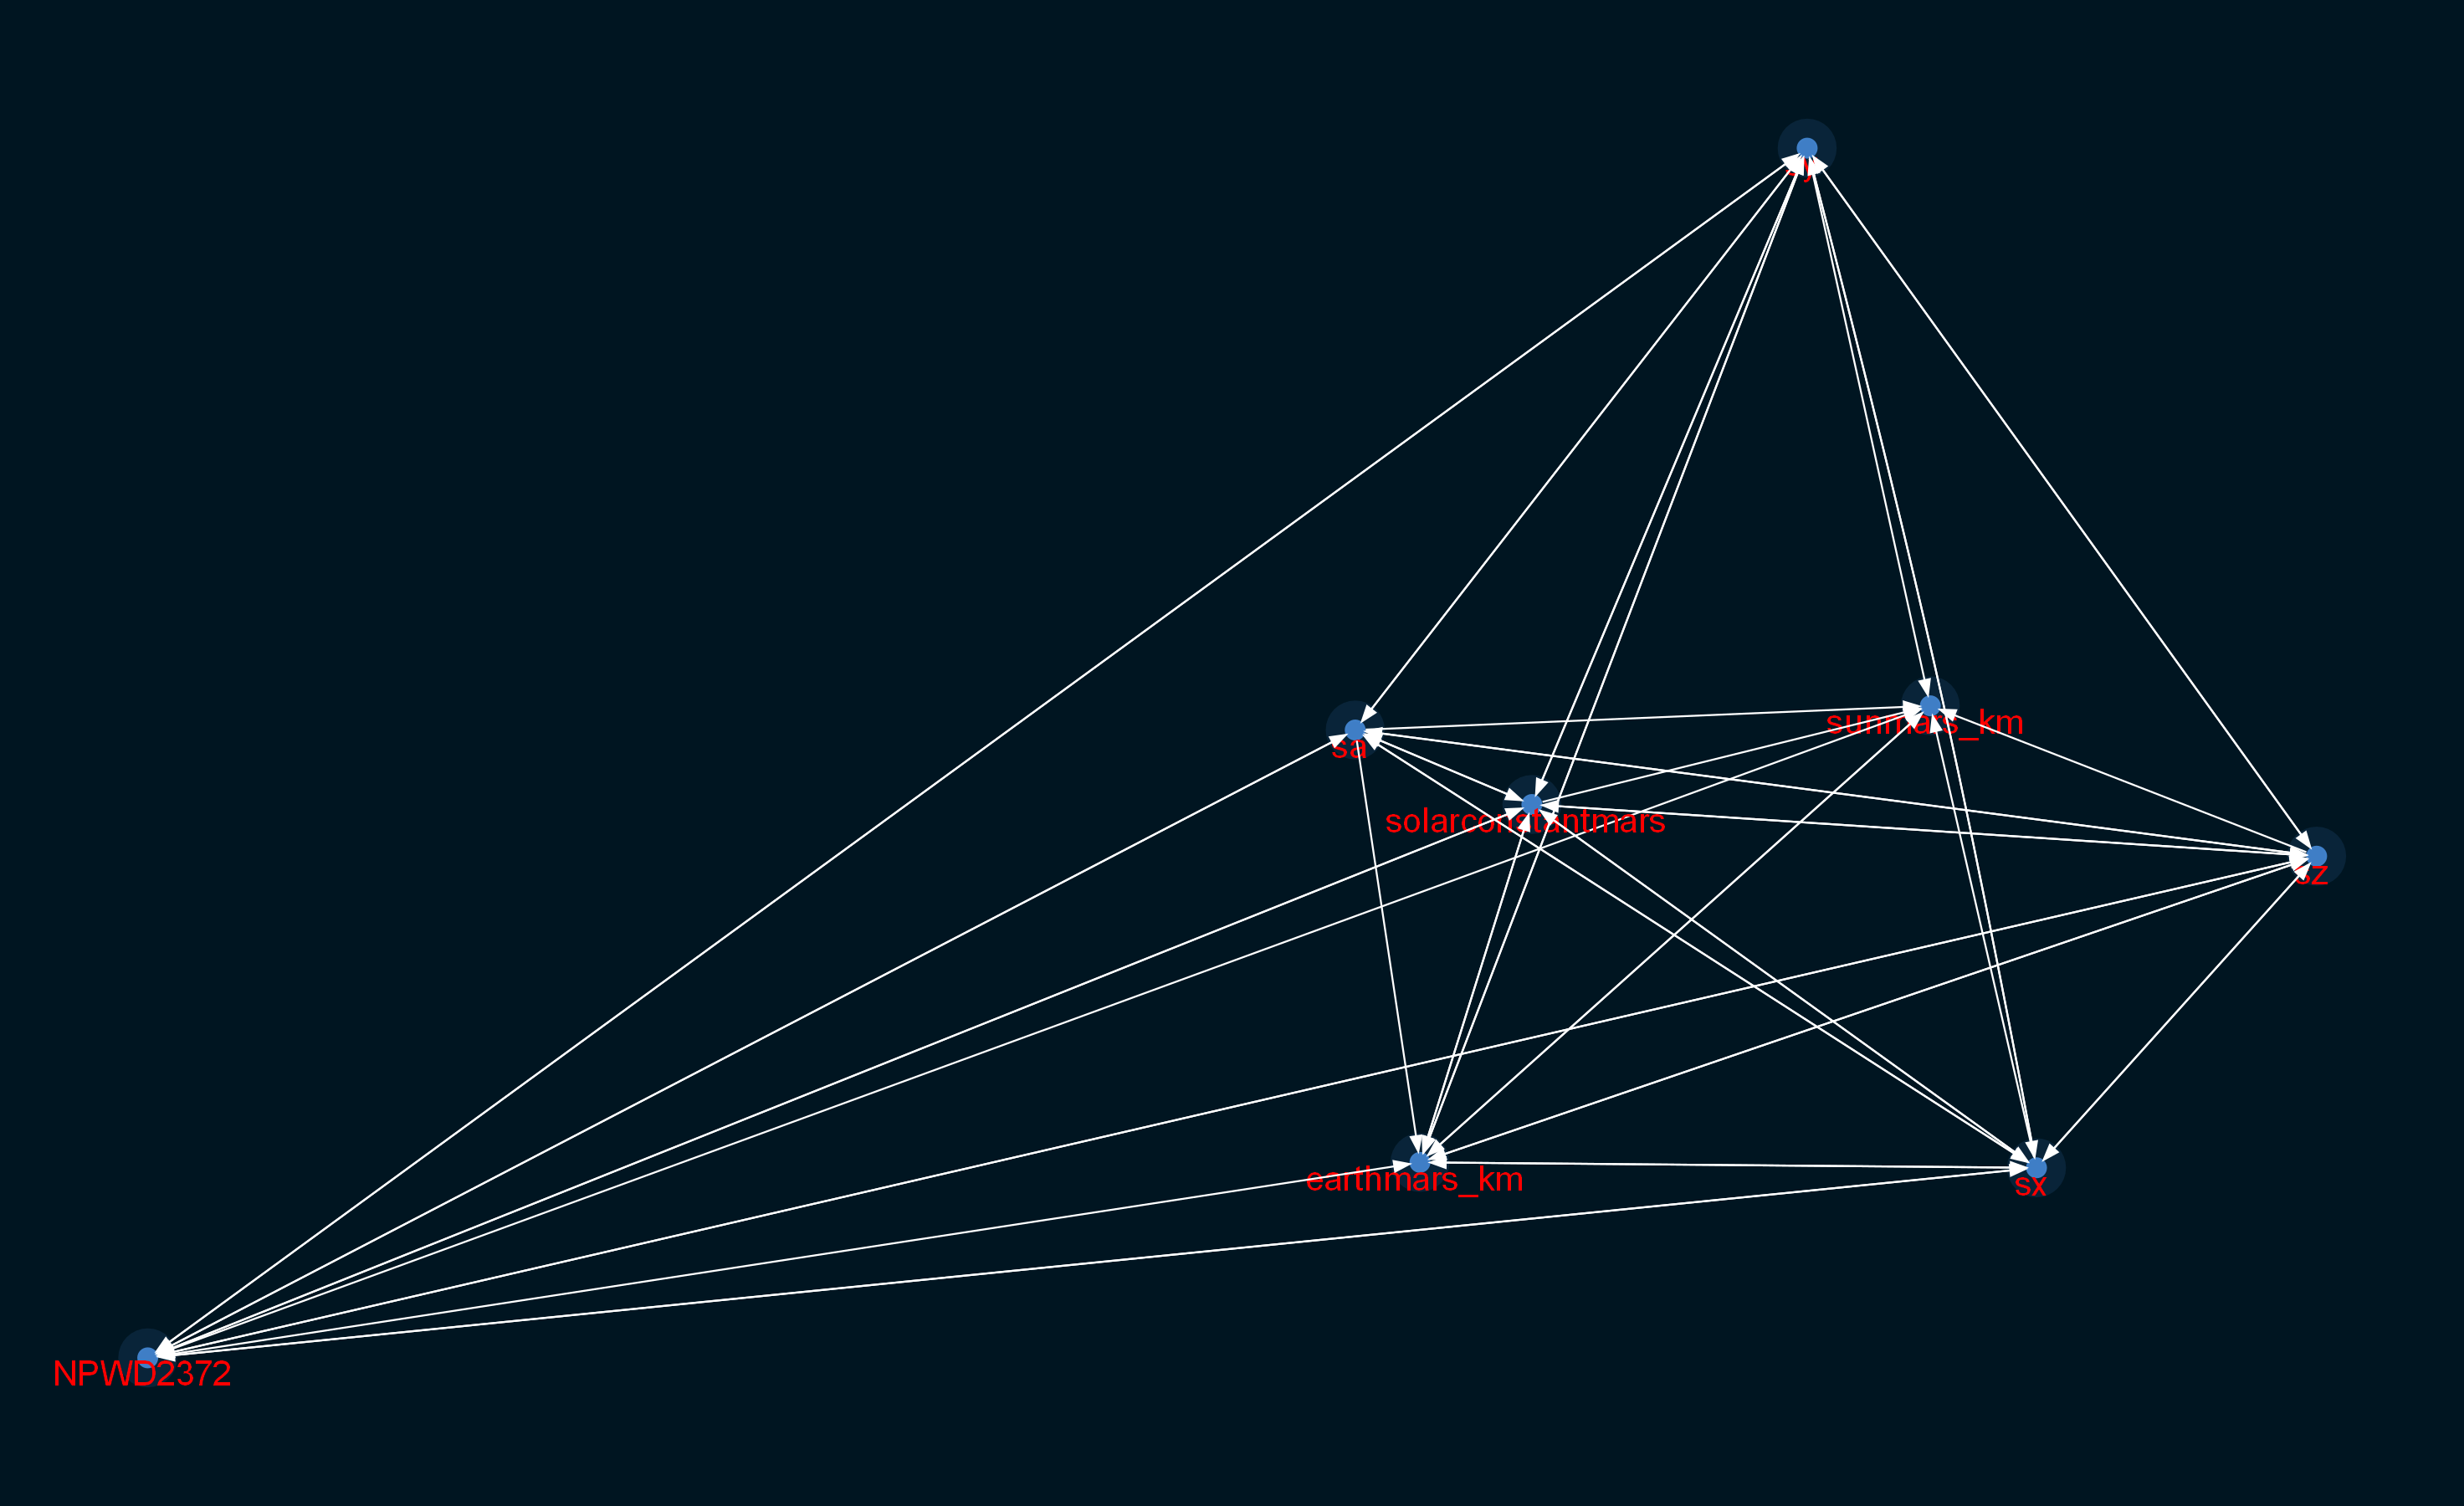

In [15]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
q3 = 5.392598e-09
a.reset_threshold(q3)
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

In [16]:

a.edges_to_dataframe(specific_nodes=npwd_node).sort_values(["weight"], ascending=False)

,source,target,weight
5,NPWD2372,earthmars_km,9.999314e-02
4,NPWD2372,sunmars_km,8.777512e-02
2,NPWD2372,sy,7.832404e-07
9,sy,NPWD2372,7.832404e-07
3,NPWD2372,sz,7.528631e-07
10,sz,NPWD2372,7.528631e-07
1,NPWD2372,sx,1.613901e-07
8,sx,NPWD2372,1.613901e-07
6,NPWD2372,solarconstantmars,1.416512e-07
11,solarconstantmars,NPWD2372,1.416512e-07


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


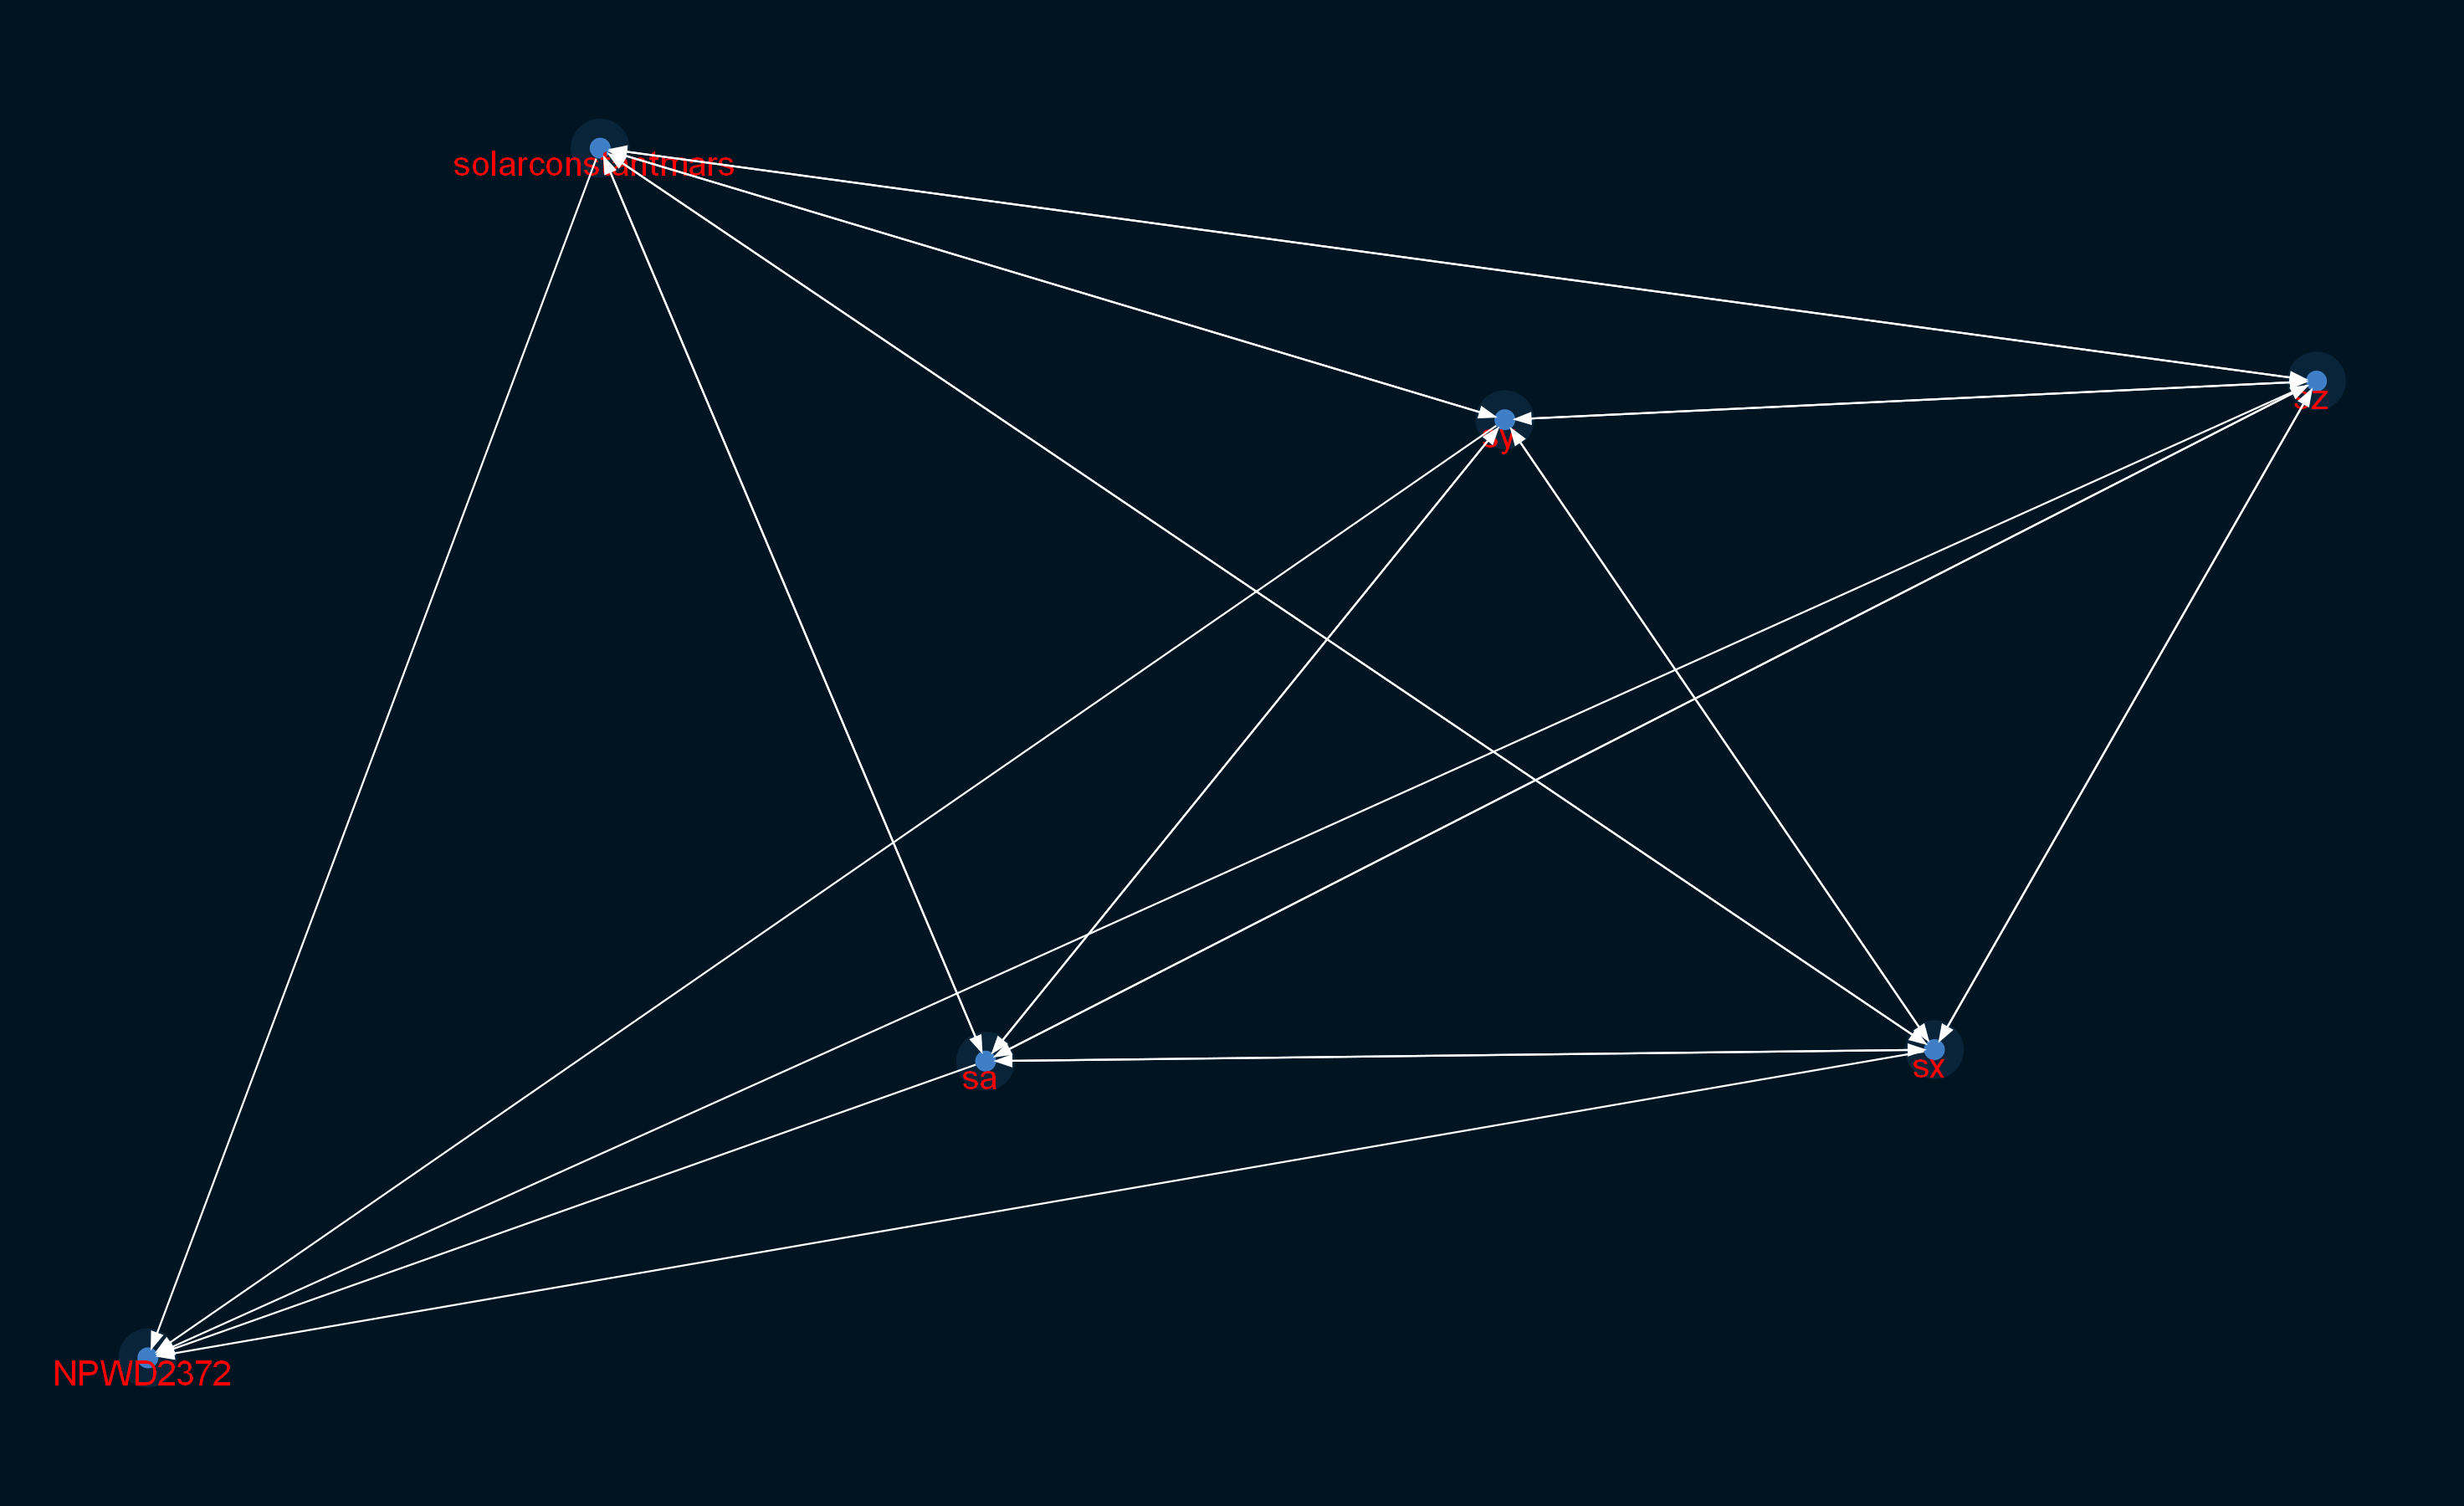

In [17]:
# Es difícil de imaginar cómo las corrientes NPWD pueden influir en la distancia de marte al sol y a la tierra. Nos quedamos solo con relaciones de NPWD a sunmars_km y earthmars_km
# Primero seleccionamos estas aristas del grafo en el dataframe y después las descartamos en nuestro objeto de CausalnexDataset.
# Representamos el grafo resultante

edges = a.get_all_edges()

edges_to_remove = [(u, v) for u, v, w in edges if npwd_node == u]

a.remove_edges(edges_to_remove)


viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))


In [18]:
# Si deseamos incluir algunas relaciones en el grafo que consideremos relevantes para nuestro análisis, podemos hacerlo manualmente.
# Vamos a incluir la relación de la distancia de la tierra a marte y la distancia del sol a marte con el ángulo tierra-marte-sol

edges_to_add= [("sunmars_km", "sunmarsearthangle_deg"),("earthmars_km", "sunmarsearthangle_deg")]
a.add_edges(edges=edges_to_add)


In [19]:
# Para representar el grafo indicaremos los nodos que queremos que aparezcan, nos quedaremos solo con las relaciones que afecten a NPWD
nodes = [npwd_node, "sunmarsearthangle_deg"]
edges_to_remove = [(row["source"], row["target"]) for i, row in a.edges_to_dataframe(specific_nodes=nodes).iterrows() if  row["target"] not in nodes ]
a.remove_edges(edges=edges_to_remove)
df = a.edges_to_dataframe(specific_nodes=nodes)
df.describe()

,weight
count,2.400000e+01
mean,1.582861e-05
std,4.389790e-05
min,5.392598e-09
25%,2.036543e-08
50%,9.079663e-08
75%,7.898151e-07
max,1.644717e-04


In [20]:
mean = 1.414147e-06
a.reset_threshold(mean, keep_previous_changes=True)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


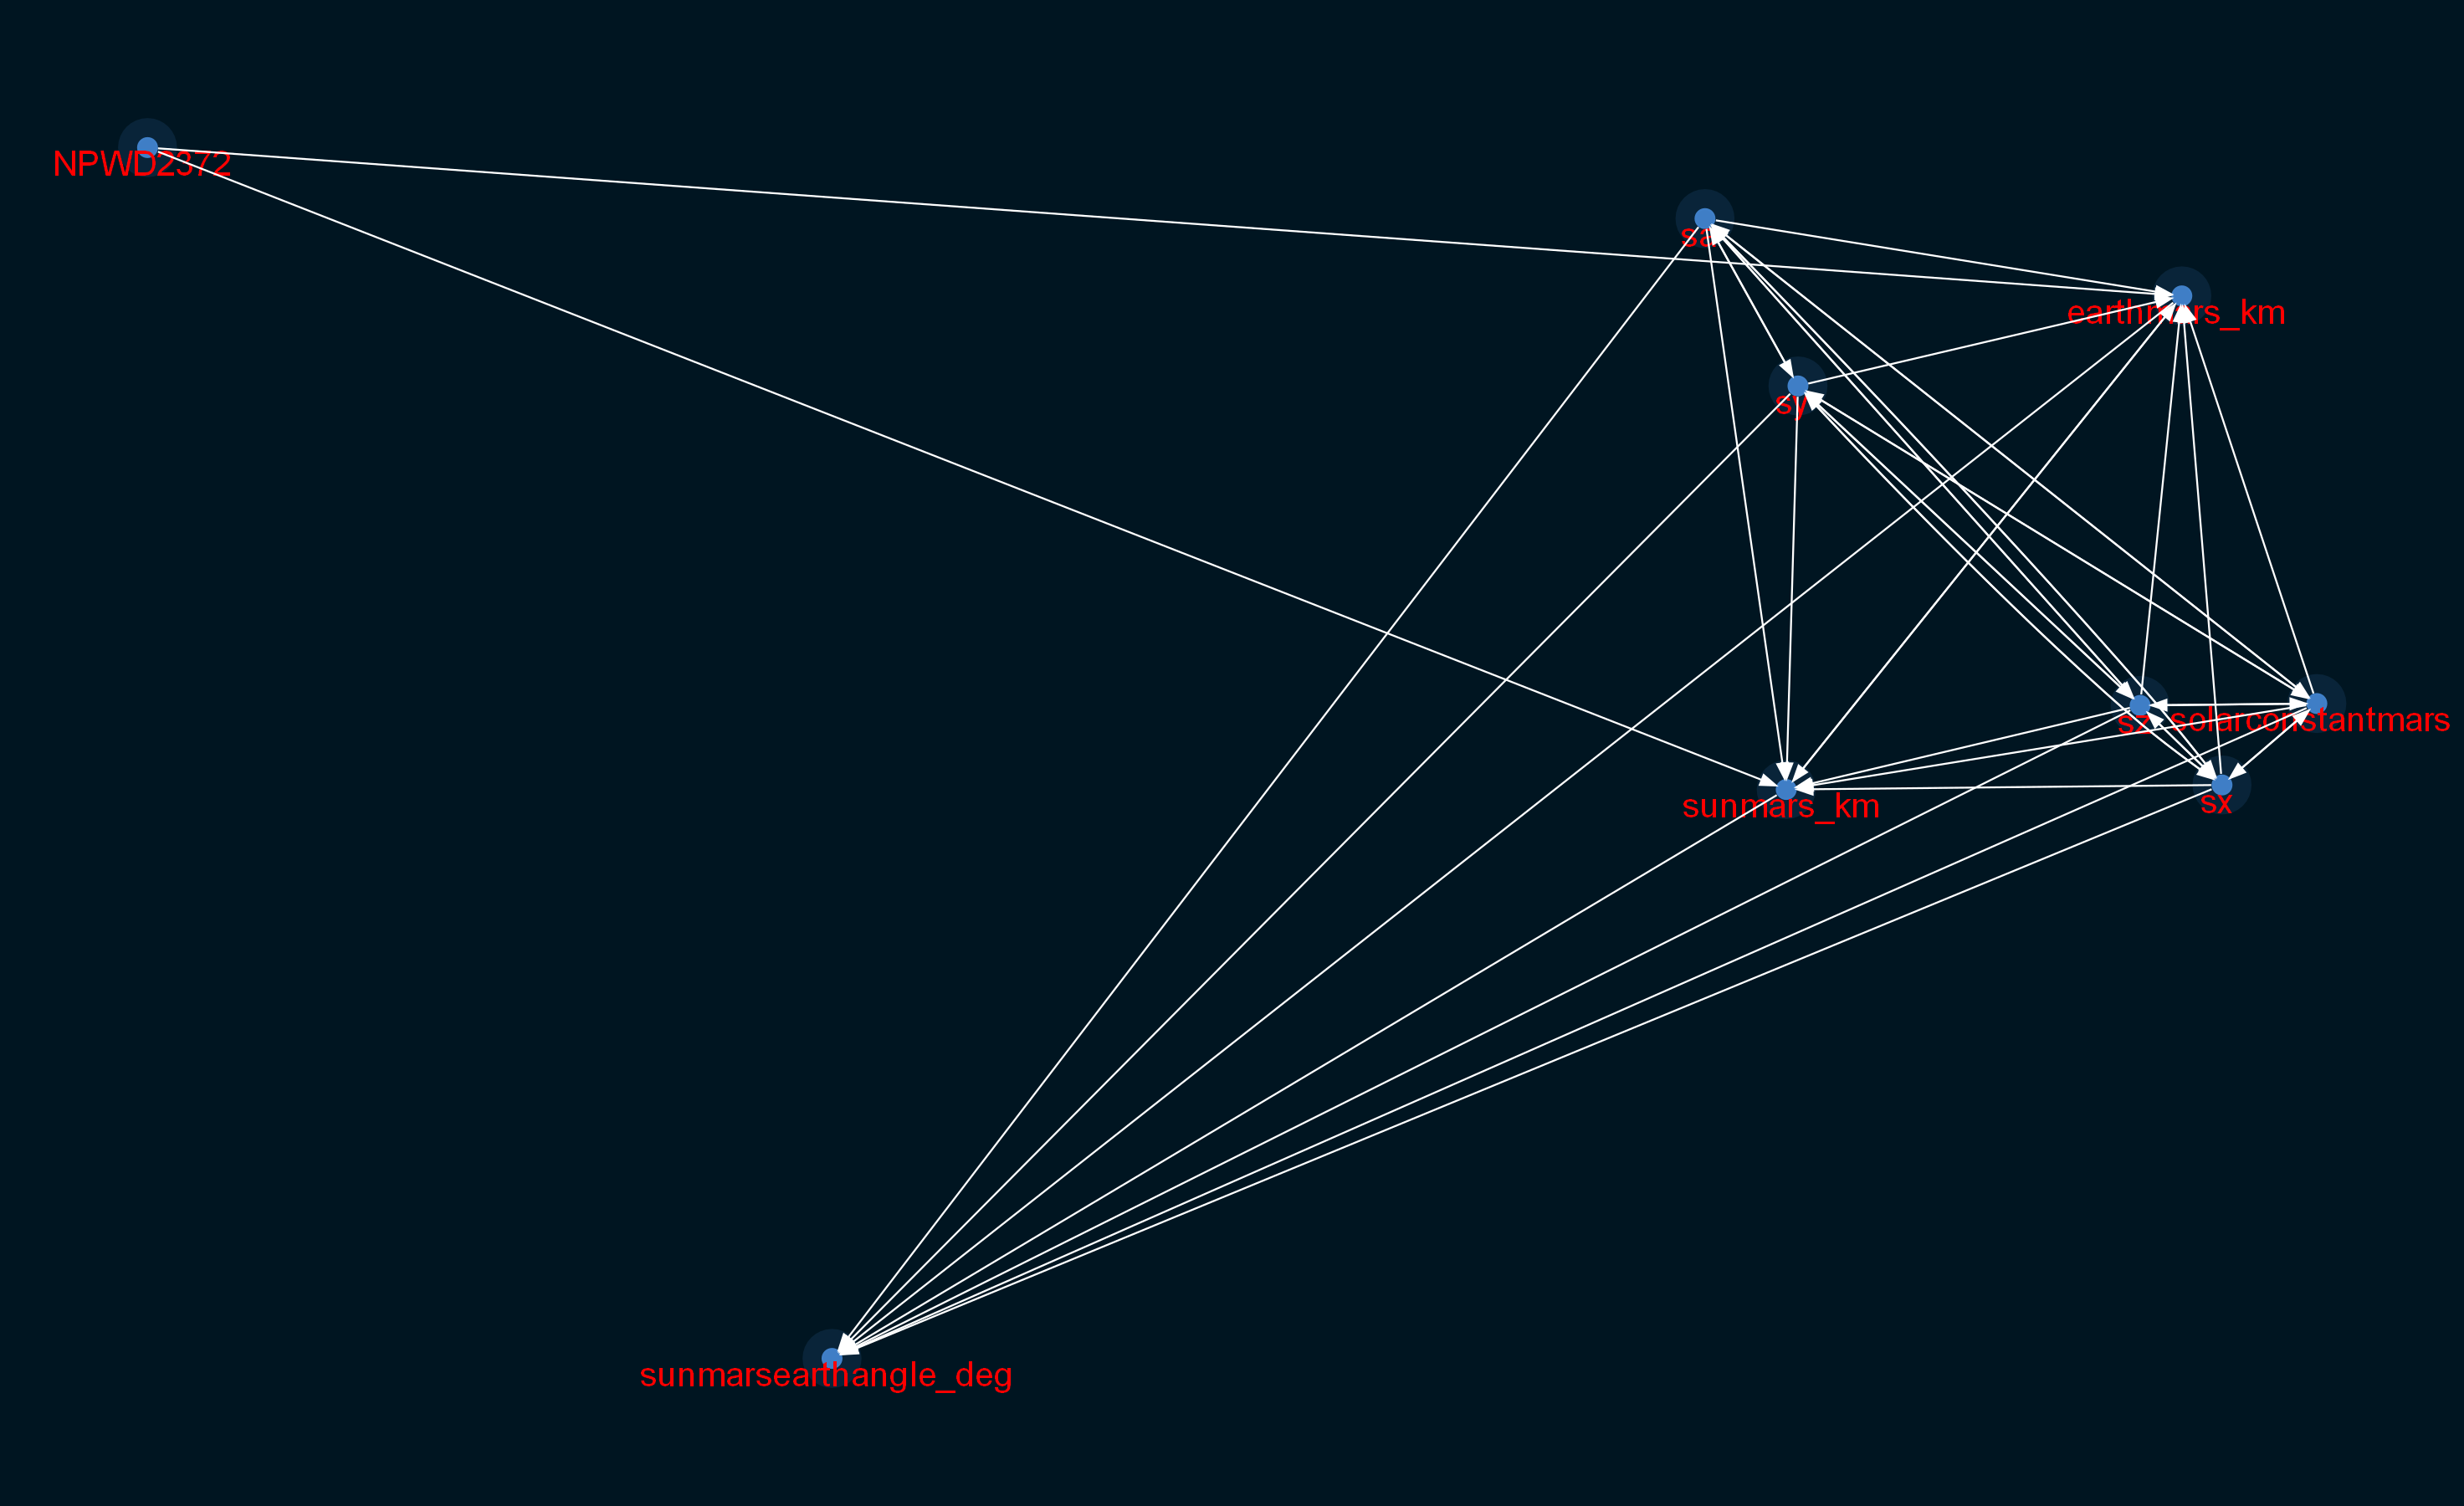

In [21]:


viz = a.get_graph(specific_nodes=nodes)
Image(viz.draw(format="png"))